In [17]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [4]:
df=pd.read_csv('twitter_validation.csv')

In [5]:
df.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [24]:
df.columns

Index(['3364', 'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')

In [25]:
# Rename columns for Twitter validation
df.columns = ['ID', 'Source', 'Sentiment', 'Text']

df.head()

,ID,Source,Sentiment,Text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [6]:
data=pd.read_csv('twitter_training.csv')

In [7]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [27]:
# Rename columns for Twitter training
data.columns = ['ID','Borderlands', 'Sentiment', 'Text']


data.head()

,ID,Borderlands,Sentiment,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         999 non-null    int64 
 1   Source     999 non-null    object
 2   Sentiment  999 non-null    object
 3   Text       999 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.3+ KB


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           74681 non-null  int64 
 1   Borderlands  74681 non-null  object
 2   Sentiment    74681 non-null  object
 3   Text         73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [30]:
df.isnull().sum()

ID           0
Source       0
Sentiment    0
Text         0
dtype: int64

In [31]:
data.isnull().sum()

ID               0
Borderlands      0
Sentiment        0
Text           686
dtype: int64

In [36]:
# Check data types of the 'Text' column
print(df['Text'].dtype)
print(data['Text'].dtype)

object
object


In [37]:
# Replace missing values in the 'Text' column with an empty string
data['Text'] = data['Text'].fillna('')

In [38]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove URLs, mentions, hashtags, and special characters
    text = re.sub(r'http\S+|@\w+|#\w+|[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [39]:
# Apply preprocessing to training and validation data
df['cleaned_text'] = df['Text'].apply(preprocess_text)
data['cleaned_text'] = data['Text'].apply(preprocess_text)

# Display a sample of cleaned text
df[['Text', 'cleaned_text']].head()

,Text,cleaned_text
0,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects claims...
1,@Microsoft Why do I pay for WORD when it funct...,pay word functions poorly chromebook
2,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking full closet hacking truly awf...
3,Now the President is slapping Americans in the...,president slapping americans face really commi...
4,Hi @EAHelp I’ve had Madeleine McCann in my cel...,hi ive madeleine mccann cellar past years litt...


In [40]:
data[['Text', 'cleaned_text']].head()

,Text,cleaned_text
0,I am coming to the borders and I will kill you...,coming borders kill
1,im getting on borderlands and i will kill you ...,im getting borderlands kill
2,im coming on borderlands and i will murder you...,im coming borderlands murder
3,im getting on borderlands 2 and i will murder ...,im getting borderlands murder
4,im getting into borderlands and i can murder y...,im getting borderlands murder


C:\Users\HP\AppData\Local\Temp\ipykernel_19756\1470028051.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='viridis')


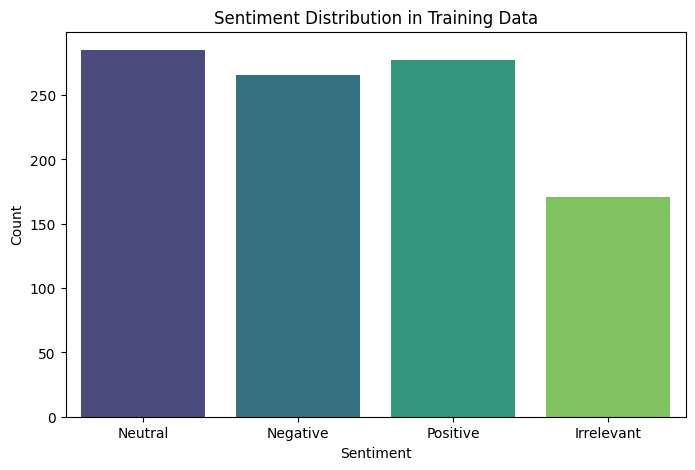

C:\Users\HP\AppData\Local\Temp\ipykernel_19756\1470028051.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=data, palette='coolwarm')


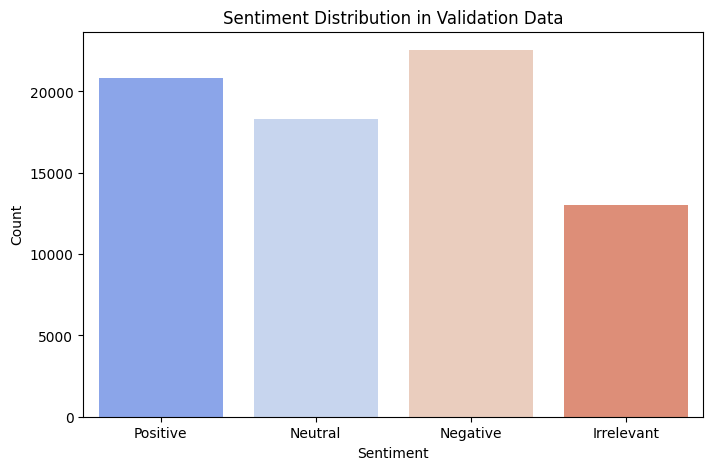

In [41]:
# Plot sentiment distribution for training data
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution in Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Plot sentiment distribution for validation data
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', data=data, palette='coolwarm')
plt.title('Sentiment Distribution in Validation Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training and validation data
X_train = vectorizer.fit_transform(df['cleaned_text']).toarray()
X_val = vectorizer.transform(data['cleaned_text']).toarray()

# Extract labels
y_train = df['Sentiment']
y_val = data['Sentiment']

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Evaluate on validation data
y_pred = model.predict(X_val)
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

print("Accuracy:", accuracy_score(y_val, y_pred))


Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.63      0.13      0.21     12990
    Negative       0.57      0.56      0.57     22542
     Neutral       0.40      0.60      0.48     18318
    Positive       0.52      0.56      0.54     20831

    accuracy                           0.50     74681
   macro avg       0.53      0.46      0.45     74681
weighted avg       0.53      0.50      0.48     74681

Accuracy: 0.495052289069509


In [47]:
print(df['Sentiment'].value_counts())

Sentiment
Neutral       285
Positive      277
Negative      266
Irrelevant    171
Name: count, dtype: int64


In [49]:
print(df[df['cleaned_text'].str.len() < 5].head())

       ID             Source Sentiment            Text cleaned_text
71   9608  PlayStation5(PS5)  Negative      God when 🥺          god
161  7213    LeagueOfLegends  Negative             WTF          wtf
182  6339               FIFA  Negative            Damn         damn
217  3263           Facebook  Positive             Wow          wow
331  8788              NBA2K  Negative  Not this again             


In [50]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    text = re.sub(r'http\S+|@\w+|#\w+|[^A-Za-z\s]', '', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


In [51]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 2))  # Unigrams and bigrams

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limit vocabulary size
X_train = vectorizer.fit_transform(df['cleaned_text'])

In [54]:
df['text_length'] = df['cleaned_text'].apply(len)
df['exclamation_count'] = df['cleaned_text'].apply(lambda x: x.count('!'))

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'penalty': ['l2']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print(grid.best_params_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

{'C': 1, 'penalty': 'l2'}


In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation accuracy:", scores.mean())

Cross-validation accuracy: 0.4744874371859297
